## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 各隊薪資佔聯盟總薪資的佔比
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係
* 薪資組合和戰績的關係


### 首先先匯入會用到的函式庫

In [1]:
library(ggplot2)
library(dplyr)
getwd()
dir()


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] "D:/github 工作區/MLB-baseball"

[1] "25人名單薪資"                            
 [2] "Data Analysis-pie chart 陳聿哲 .ipynb"   
 [3] "Data Analysis - 豐瑾.ipynb"              
 [4] "Data Analysis.ipynb"                     
 [5] "strange html_table result in Rstudio.Rmd"
 [6] "爬取各年球隊薪資.ipynb"                  
 [7] "爬取各隊25人名單薪資.ipynb"              
 [8] "清洗各年度戰績.ipynb"                    
 [9] "球隊薪資"                                
[10] "新各年各隊戰績"                          
[11] "戰績"                                    
[12] "戰績與薪資組合的資料清洗.ipynb"

In [2]:
data <- read.csv("球隊薪資\\2018.csv")
head(data)


Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


In [3]:
salList <- list()
for (i in c(2011:2018))
{
    salList[[i - 2010]] <- read.csv(paste("球隊薪資\\", toString(i), ".csv", sep=""))
}

standingList <- list()
for (i in c(2011:2018))
{
    standingList[[i - 2010]] <- read.csv(paste("戰績\\", toString(i), ".csv", sep=""))
}
head(standingList[[1]])

Name,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF,STRK,L10
<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
Philadelphia Phillies,102,60,0.630,-,52-29,50-31,713,529,184,W4,4-6
New York Yankees,97,65,0.599,5,52-29,45-36,867,657,210,L4,5-5
Milwaukee Brewers,96,66,0.593,6,57-24,39-42,721,638,83,W2,7-3
Texas Rangers,96,66,0.593,6,52-29,44-37,855,677,178,W6,9-1
Detroit Tigers,95,67,0.586,7,50-31,45-36,787,711,76,W4,7-3
Arizona Diamondbacks,94,68,0.580,8,51-30,43-38,731,662,69,L1,7-3


In [4]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSal <- c()

for (i in c(1:8))
{
    meanSal[i] <- mean(salList[[i]][, "X25.Man.Payroll"]) * inflation[i] / 10000000
}

salary <- data.frame(meanSalary=meanSal, year=c(2011:2018))


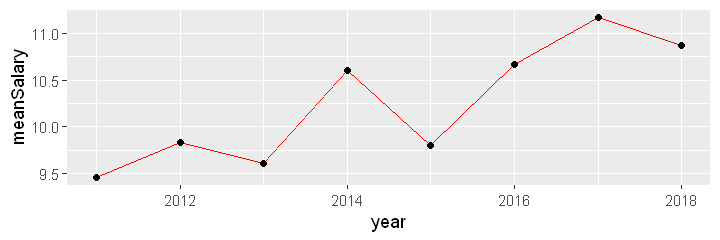

In [5]:
# Create a line plot showing the change in meanSalary over time
# 少了單位"千萬"和美化它
options(repr.plot.width = 6, repr.plot.height = 2)
ggplot(salary, aes(year, meanSalary)) + geom_line(color="red") + geom_point()

# 各隊薪資占比 (以年份作單位)
* X25.Man.Payroll 圓餅圖
* X2018.Total.Payroll 圓餅圖

In [6]:
# 整理salList 成一個dataframe ,mutate new column---year ,column : X25.Man.Payroll
tmp_data <- lapply(salList,function(x){colnames(x)[8] <- "Total.Payroll" ;return(x)})
names(tmp_data) <- 2011 : 2018
for (i in 1 : length(tmp_data)){
    tmp <- tmp_data[[i]][,c(1,3,8)]
    tmp <- tmp %>% mutate(year = names(tmp_data)[i])
    if(i == 1){
        data <- tmp
    }
    else {
        data <- rbind(data,tmp)
    }
}
# row 61 is useless  : Florida Marlins               0        918033   2012
data <- data[-61,]

data[,4] <- as.factor(data[,4])
head(data)


Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

Team,X25.Man.Payroll,Total.Payroll,year
<fct>,<int>,<int>,<fct>
New York Yankees,212609678,213559678,2011
Boston Red Sox,164517590,172553261,2011
Philadelphia Phillies,169799882,169968182,2011
Los Angeles Angels,133613959,146648559,2011
New York Mets,96163418,141831841,2011
Chicago Cubs,124652698,139477698,2011


## pie chart for X25.Man.Payroll

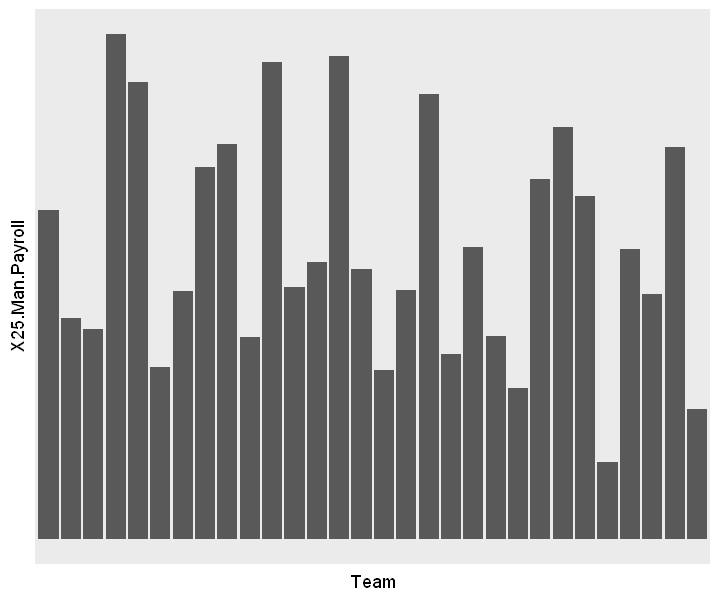

In [31]:
# look at year 2018
data_2018 <-  data %>%　filter(year %in% as.factor(2018))
options(repr.plot.width=6, repr.plot.height=5)
ggplot(data_2018 ,aes(x = Team ,y = X25.Man.Payroll )) +
    geom_bar(stat = "identity") +
    theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())


###  待改